In [5]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [6]:
len(train_data)

8982

In [7]:
len(test_data)

2246

In [19]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [24]:
from keras import models
from keras import layers
from keras .callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience=100) 
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

In [21]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i ,label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [25]:
history = model.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.6158 - accuracy: 0.5510 - val_loss: 1.7202 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4101 - accuracy: 0.7055 - val_loss: 1.2868 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0322 - accuracy: 0.7806 - val_loss: 1.1240 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8070 - accuracy: 0.8320 - val_loss: 1.0194 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6377 - accuracy: 0.8663 - val_loss: 0.9507 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5095 - accuracy: 0.8940 - val_loss: 0.9337 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4156 - accuracy: 0.9133 - val_loss: 0.8956 - val_accuracy: 0.8120
Epoch 8/20
16

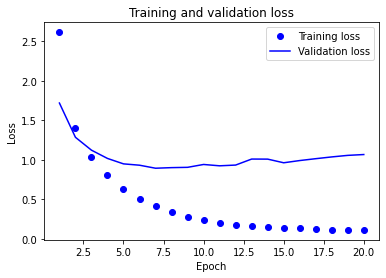

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
from keras import models
from keras import layers
from keras .callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2) 
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

In [28]:
history = model.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/20
16/16 [==============================] - 2s 60ms/step - loss: 2.6717 - accuracy: 0.5342 - val_loss: 1.7739 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4463 - accuracy: 0.7021 - val_loss: 1.3482 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0783 - accuracy: 0.7697 - val_loss: 1.1692 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8491 - accuracy: 0.8236 - val_loss: 1.0600 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6821 - accuracy: 0.8566 - val_loss: 0.9848 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5434 - accuracy: 0.8851 - val_loss: 0.9336 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4377 - accuracy: 0.9069 - val_loss: 0.9205 - val_accuracy: 0.8190
Epoch 8/20
16

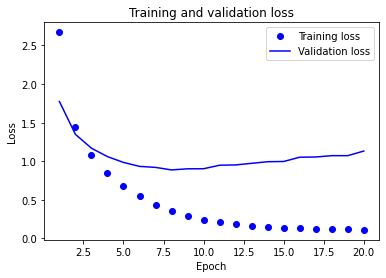

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
from keras import models
from keras import layers
from keras .callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2) 
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

In [31]:
history = model.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/20
16/16 [==============================] - 1s 59ms/step - loss: 2.6621 - accuracy: 0.4473 - val_loss: 1.7755 - val_accuracy: 0.6040
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4520 - accuracy: 0.6893 - val_loss: 1.3095 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0813 - accuracy: 0.7612 - val_loss: 1.1283 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8487 - accuracy: 0.8158 - val_loss: 1.0392 - val_accuracy: 0.7480
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6786 - accuracy: 0.8507 - val_loss: 0.9581 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5398 - accuracy: 0.8824 - val_loss: 0.9032 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4336 - accuracy: 0.9077 - val_loss: 0.9111 - val_accuracy: 0.7960
Epoch 8/20
16

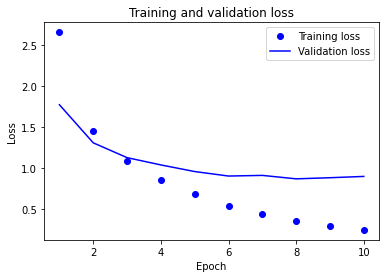

In [32]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9976 - accuracy: 0.7863


In [34]:
predictions = model.predict(x_test)

In [35]:
predictions.shape

(2246, 46)

In [36]:
predictions[0]

array([6.65141124e-05, 3.39529433e-05, 1.74352317e-06, 9.92313445e-01,
       4.70507890e-03, 1.34484117e-06, 4.59955163e-06, 4.11376959e-06,
       1.27802370e-03, 1.35423834e-05, 2.60341517e-06, 2.69665936e-04,
       7.07366462e-06, 3.22544947e-05, 1.93426288e-07, 1.84071214e-05,
       2.40072855e-04, 7.89474655e-07, 3.42876251e-06, 2.49187542e-05,
       4.35570459e-04, 3.93469454e-05, 4.36310711e-06, 3.20058971e-05,
       1.33650110e-06, 8.63286004e-07, 4.29615147e-06, 6.78607603e-06,
       1.09424045e-05, 3.12967313e-05, 3.60853574e-06, 1.04581477e-05,
       1.07502419e-05, 1.52092241e-06, 2.66777511e-06, 1.00244802e-06,
       1.06308406e-04, 6.79694449e-06, 1.02328067e-06, 7.68079626e-05,
       8.46030105e-07, 1.84899793e-04, 1.14435340e-06, 1.62147649e-06,
       1.34316636e-07, 1.76530727e-06], dtype=float32)

In [38]:
np.argmax(predictions[1])

10